In [122]:
#Packages required for machine learning

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline

In [123]:
wine = pd.read_csv('/content/drive/MyDrive/IDA/Exam practice/winequality-red.csv')

In [124]:
# a score between 0 - 10 gives us the quality of wine
wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [125]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


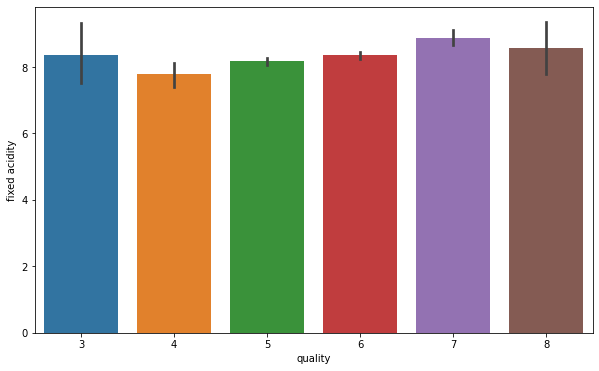

In [126]:
fig = plt.figure(figsize = (10, 6))
sns.barplot(x='quality', y = 'fixed acidity', ci = 90 , data = wine)

#**Preprocessing Data for performing machine learning**

In [127]:
#Binary classification for the response variable
#Dividing wine as good or bad by giving limit for quality

bins = (2, 6.5, 8)
group_name = ['bad' ,'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels=group_name)

In [128]:
#Assign Label to quality variable

label_quality = LabelEncoder()

In [129]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [130]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


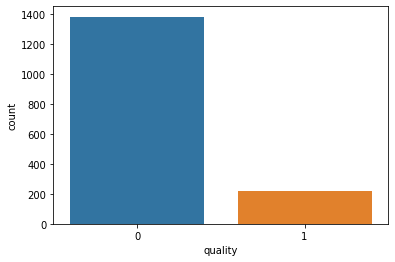

In [131]:
sns.countplot(wine['quality'])

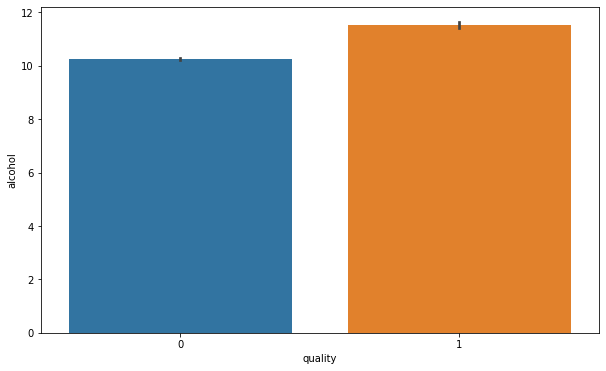

In [132]:
fig = plt.figure(figsize = (10, 6))
sns.barplot(x='quality', y = 'alcohol', ci = 90 , data = wine)

# **Machine Learning**

In [133]:
# seperate into response and feature variable

x = wine.drop('quality', axis = 1)
y = wine['quality']

In [134]:
# train and test data split 

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)


In [135]:
# Scale data so that it is betweeen 0 - 1
sc = StandardScaler()

In [136]:
#Scale the train set and test

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


## Now that our dataset is ready. So we have spliy into a training and test set, we can now run our machine learning algorithm


In [137]:
#Random Forest

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)


In [138]:
# statistics

print(classification_report(y_test, pred_rfc))


              precision    recall  f1-score   support

           0       0.91      0.96      0.93       273
           1       0.67      0.43      0.52        47

    accuracy                           0.88       320
   macro avg       0.79      0.69      0.73       320
weighted avg       0.87      0.88      0.87       320



In [139]:
# True positives, True negatives, False positives, False Negatives

confusion_matrix(y_test,pred_rfc)

array([[263,  10],
       [ 27,  20]])

In [140]:
#accuracy score

accuracy_score(y_test,pred_rfc)

0.884375

In [141]:
#Support vector machine

svc = SVC(probability=True)

In [142]:
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)


In [143]:
# statistics

print(classification_report(y_test, pred_svc))


              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [144]:
# True positives, True negatives, False positives, False Negatives

confusion_matrix(y_test,pred_svc)

array([[268,   5],
       [ 35,  12]])

In [145]:
#accuracy score

accuracy_score(y_test,pred_svc)

0.875

In [146]:
#K-nearest neigbour

knn = KNeighborsClassifier(n_neighbors=200)
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)



In [147]:
# statistics

print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       273
           1       0.00      0.00      0.00        47

    accuracy                           0.85       320
   macro avg       0.43      0.50      0.46       320
weighted avg       0.73      0.85      0.79       320



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [148]:
# True positives, True negatives, False positives, False Negatives

confusion_matrix(y_test,pred_knn)

array([[273,   0],
       [ 47,   0]])

In [149]:
accuracy_score(y_test,pred_knn)

0.853125

In [150]:
#Logistic Regression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
pred_logreg = logreg.predict(x_test)


In [151]:
# statistics

print(classification_report(y_test, pred_logreg))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [152]:
# True positives, True negatives, False positives, False Negatives

confusion_matrix(y_test,pred_logreg)

array([[268,   5],
       [ 35,  12]])

In [153]:
#accuracy score

accuracy_score(y_test,pred_logreg)

0.875

In [154]:
#Prediction Probabilities


rfc_probs = rfc.predict_proba(x_test)
svc_probs = svc.predict_proba(x_test)
knn_probs = knn.predict_proba(x_test)
logr_probs = logreg.predict_proba(x_test)

In [155]:
rfc_probs = rfc_probs[:, 1]
svc_probs = svc_probs[:, 1]
knn_probs = knn_probs[:, 1]
logr_probs = logr_probs[:, 1]

In [156]:
#ROC Score

rfc_auc = roc_auc_score(y_test, rfc_probs)
svc_auc = roc_auc_score(y_test, svc_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
logr_auc = roc_auc_score(y_test, logr_probs)

In [157]:
#Print AUROC Scores

print('Random Forest: AUROC = %.3f' % (rfc_auc))
print('SVM: AUROC = %.3f' % (svc_auc))
print('K-nearest neighbour: AUROC = %.3f' % (knn_auc))
print('Logistic Regression: AUROC = %.3f' % (logr_auc))

Random Forest: AUROC = 0.931
SVM: AUROC = 0.878
K-nearest neighbour: AUROC = 0.880
Logistic Regression: AUROC = 0.890


In [160]:
#Calculate ROC Curve

rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_probs)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logr_probs)

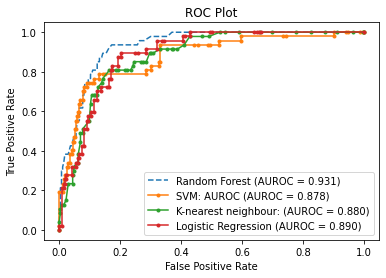

In [161]:
#PLeot the ROC curv

plt.plot(rfc_fpr, rfc_tpr, linestyle='--', label='Random Forest (AUROC = %0.3f)' % rfc_auc)
plt.plot(svc_fpr, svc_tpr, marker='.', label='SVM: AUROC (AUROC = %0.3f)' % svc_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='K-nearest neighbour: (AUROC = %0.3f)' % knn_auc)
plt.plot(logreg_fpr, logreg_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % logr_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot